# 岭回归

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
np.random.seed(666)
x = np.random.uniform(-3.0,3.0,size=100)
X = x.reshape(-1,1)
y = 0.5 * x + 3 + np.random.normal(0,1,size=100)

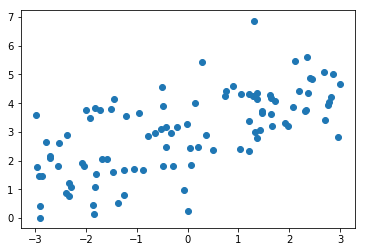

In [5]:
plt.scatter(x,y)
plt.show()

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("lin_reg",LinearRegression())
    ])


In [11]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [13]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train,y_train)

y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test,y_poly_predict)

1.608463023290914

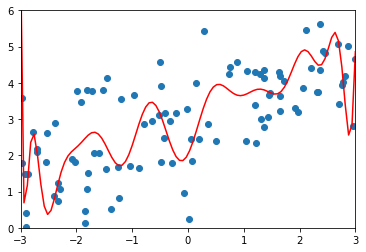

In [14]:
X_plot = np.linspace(-3,3,100).reshape(100,1)
y_plot = poly_reg.predict(X_plot)

plt.scatter(x,y)
plt.plot(X_plot[:,0],y_plot,color='r')
plt.axis([-3,3,0,6])
plt.show()

In [21]:
def plot_model(model):
    X_plot = np.linspace(-3,3,100).reshape(100,1)
    y_plot = model.predict(X_plot)
    
    plt.scatter(x,y)
    plt.plot(X_plot[:,0],y_plot,color='r')
    plt.axis([-3,3,0,6])
    plt.show()

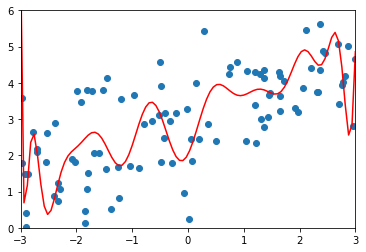

In [22]:
plot_model(poly_reg)

# 岭回归

In [23]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree,alpha):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("ridge_reg",Ridge(alpha=alpha))
    ])

In [24]:
ridge1_reg = RidgeRegression(20,0.0001)
ridge1_reg.fit(X_train,y_train)

y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test,y1_predict)

0.9155438257570612

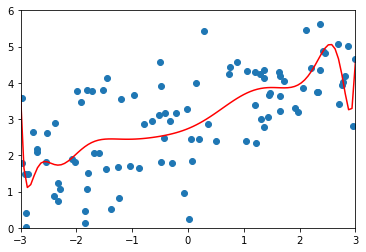

In [25]:
plot_model(ridge1_reg)

In [26]:
ridge2_reg = RidgeRegression(20,1)
ridge2_reg.fit(X_train,y_train)

y2_predict = ridge2_reg.predict(X_test)
mean_squared_error(y_test,y2_predict)

0.9510341535926566

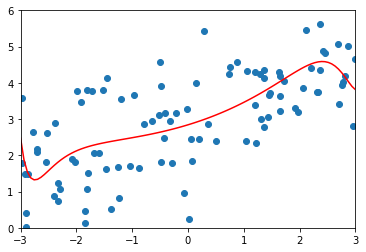

In [27]:
plot_model(ridge2_reg)

In [28]:
ridge2_reg = RidgeRegression(20,100)
ridge2_reg.fit(X_train,y_train)

y2_predict = ridge2_reg.predict(X_test)
mean_squared_error(y_test,y2_predict)

1.0028380077609713

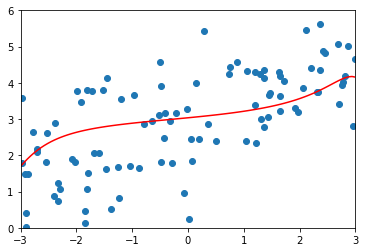

In [29]:
plot_model(ridge2_reg)